In [ ]:
! git clone https://github.com/Nelson-Gon/unet.git

In [4]:
! ls unet/data/train

aug  image  label


In [7]:
from unet.model import *
from unet.augmentation import *
from unet.data import *

Using TensorFlow backend.


In [5]:
data_gen_args = dict(rotation_range=90,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [47]:
my_generator = trainGenerator(5,'unet/data/train','image','label',data_gen_args,save_to_dir = None, seed= 12,
                              target_size = (256, 256))

In [12]:
#! mkdir unet/data/train/aug/masks unet/data/train/aug/images && mv unet/data/train/aug/image_* unet/data/train/aug/images && mv unet/data/train/aug/mask_* unet/data/train/aug/masks

In [ ]:
#show_images("unet/data/train/aug/masks/", image_suffix="png")

In [54]:
model = unet(input_size = (256, 256, 1), metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-3)
#model_checkpoint = ModelCheckpoint('models/2d_cell_net_v0.modeldef.h5', monitor='loss',verbose=1, save_best_only=True)

In [55]:

history = model.fit_generator(my_generator,steps_per_epoch=500,epochs=7)

Epoch 1/7
500/500 [==============================] - 154s 307ms/step - loss: 0.6468 - accuracy: 0.7596
Epoch 2/7
500/500 [==============================] - 149s 297ms/step - loss: 0.3511 - accuracy: 0.7640
Epoch 3/7
500/500 [==============================] - 149s 297ms/step - loss: 0.3808 - accuracy: 0.7565
Epoch 4/7
500/500 [==============================] - 148s 297ms/step - loss: 0.3177 - accuracy: 0.7719
Epoch 5/7
500/500 [==============================] - 148s 296ms/step - loss: 0.3194 - accuracy: 0.7776
Epoch 6/7
500/500 [==============================] - 148s 296ms/step - loss: 0.3183 - accuracy: 0.7775
Epoch 7/7
500/500 [==============================] - 148s 297ms/step - loss: 0.3049 - accuracy: 0.7834


In [56]:
model.save("unet_segment.hdf5")

Text(0.5, 0, 'epoch')

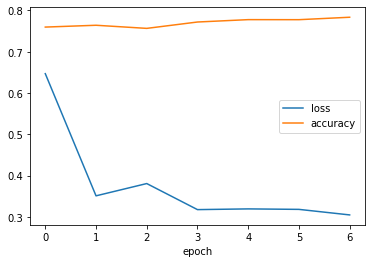

In [57]:
#dir(history)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.xlabel('epoch')

In [32]:
! ls unet/data/test && rm unet/data/test/.*_predict.png && ls unet/data/test | wc -l

30


In [58]:
test_generator = testGenerator("unet/data/test", 30, image_suffix="png")

In [59]:
model = unet(pretrained_weights="unet_segment.hdf5")
results = model.predict_generator(test_generator,30,verbose=1)

30/30 [==============================] - 1s 41ms/step


In [37]:
!mkdir unet/data/predictions

In [60]:
savePredictions("unet/data/predictions", results, image_prefix="predicted_", image_suffix="png")

In [46]:
! ls unet/data/predictions | wc -l

30


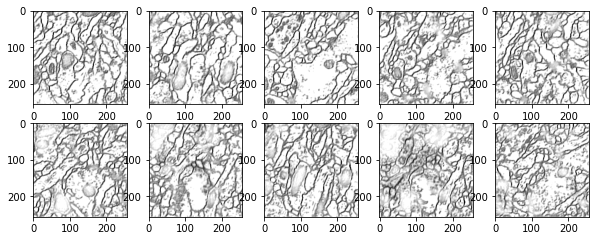

In [61]:
show_images("unet/data/predictions/", number = 10)